In [17]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor


In [18]:
data = datasets.fetch_california_housing()
df = pd.concat([pd.DataFrame(data.data), pd.Series(data.target)], axis = 1)
df.columns = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 
              'MedHouseVal']
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [19]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [20]:
df.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

Так, данные загружены и видно, что пропусков в них нет.
Далее нужно нормализовать один из признаков, логичнее всего нормализовать показатель возраста дома, так как он без выбросов, но на всякий случай проверим. 

In [21]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


<AxesSubplot:>

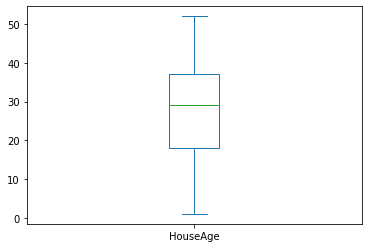

In [23]:
df['HouseAge'].plot(kind = 'box')

<AxesSubplot:>

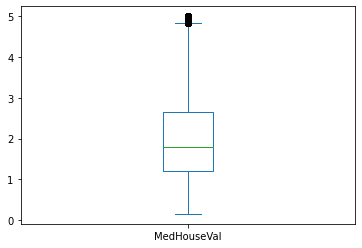

In [24]:
df['MedHouseVal'].plot(kind = 'box')

Было предположение проверить на выбросы наше целевое значаение, и как оказалось, да, они там есть, так что нормолизовывать буду возраст домов. 

По поводу методов нормализации: возникли сложности, код выдавал ошибку индексации(размерности), долго провозилась, так что решила вручную реализовать нормализацию данных через функцию. 


In [25]:
def norm_col(seria):
    seria -= seria.min()
    seria /= seria.max() - seria.min()
    return seria

df['HouseAge'] = norm_col(df['HouseAge'])
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,0.541951,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,0.246776,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,0.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,0.333333,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,0.549020,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,0.705882,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,1.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [26]:
x = df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]
y = df['MedHouseVal']


Окей, мы нормализовали признак, разделили значения x & y, далее обучаем модель регрессии на обучаеющем множестве. 

Для этого сделаю модель отвечающую всем запросам 

In [27]:
def get_score(x, y, random_seed = 7, model = None, print_metrics = False, test_size = 0.2):
    if model is None:
        model = LinearRegression()
        
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_size, random_state = random_seed)  
    
    model.fit(x_train, y_train)
    score = model.score(x_test, y_test)
    y_pred = model.predict(x_test)
    print(f'Предсказания целевой переменной:  {y_pred}')
    
    if print_metrics:
        print(f'Коэффициент детерминации: {score}')
        
    return model, score, y_pred

In [28]:
model1, score1, y_pred1 = get_score(x = x, y = y, print_metrics = True)

Предсказания целевой переменной:  [1.65084222 2.47797721 2.42550694 ... 1.86032202 2.39125575 3.84598092]
Коэффициент детерминации: 0.6075494500520071


Дальше работа с деревом 

In [29]:
model2, score2, y_pred2  = get_score(x = x, y = y, print_metrics = True, model = DecisionTreeRegressor
                                     (max_depth = 7))

Предсказания целевой переменной:  [1.85193599 2.55629966 3.95669858 ... 1.25396452 3.42055846 4.9120286 ]
Коэффициент детерминации: 0.657062386048491


[Text(418.5, 764.4375, 'X[0] <= 5.086\nmse = 1.328\nsamples = 16512\nvalue = 2.059'),
 Text(209.25, 662.5125, 'X[0] <= 3.076\nmse = 0.833\nsamples = 13163\nvalue = 1.733'),
 Text(104.625, 560.5875, 'X[2] <= 4.335\nmse = 0.547\nsamples = 6388\nvalue = 1.351'),
 Text(52.3125, 458.66249999999997, 'X[5] <= 2.509\nmse = 0.657\nsamples = 2769\nvalue = 1.61'),
 Text(26.15625, 356.7375, 'X[6] <= 37.915\nmse = 0.993\nsamples = 866\nvalue = 2.004'),
 Text(13.078125, 254.8125, 'X[7] <= -118.225\nmse = 1.007\nsamples = 721\nvalue = 2.154'),
 Text(6.5390625, 152.88750000000005, 'X[7] <= -122.335\nmse = 1.083\nsamples = 456\nvalue = 2.447'),
 Text(3.26953125, 50.96249999999998, 'mse = 1.187\nsamples = 52\nvalue = 3.421'),
 Text(9.80859375, 50.96249999999998, 'mse = 0.932\nsamples = 404\nvalue = 2.321'),
 Text(19.6171875, 152.88750000000005, 'X[7] <= -117.145\nmse = 0.475\nsamples = 265\nvalue = 1.65'),
 Text(16.34765625, 50.96249999999998, 'mse = 0.573\nsamples = 181\nvalue = 1.801'),
 Text(22.88671

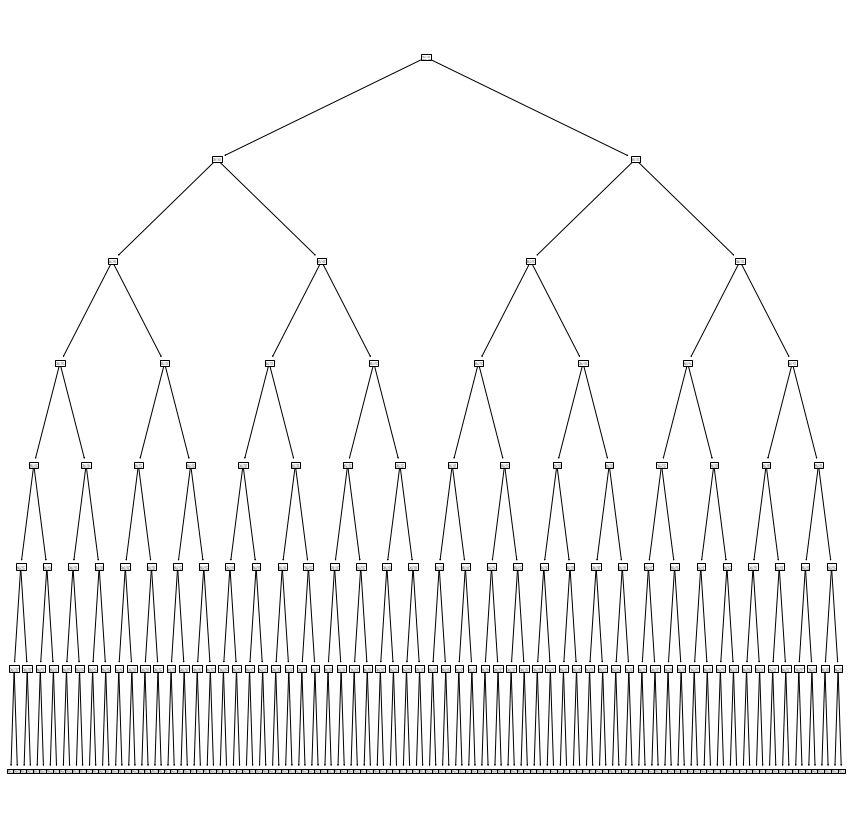

In [30]:
from sklearn import tree
plt.rcParams['figure.figsize'] = (15.0, 15.0)
tree.plot_tree(model2)

Очень не читабельное дерево, нужно указать глубину для оптимизации

Хочу сделать функцию, которая оптимизируем подбор кол-ва вопросов. 


Функция ниже позволяет для заданных пороговых значений глубины дерева (старт и максимум) вывести для каждой глубины дерева из диапазона полученное значение коэффициента детерминации.
Функция также считает максимум для коэффициента детерминации и возвращает глубину дерева для этого максимума.


In [41]:
def optimize_max_depth(start_depth = 1, max_depth = 20):
    max_score, best_depth = 0, 0
    scores, depths = [], []
    
    for cur_depth in range(start_depth, max_depth + 1):
        model_fn, score_fn, y_pred = get_score(x = x, y = y, print_metrics = False, model = DecisionTreeRegressor
                                       (max_depth = cur_depth))    
    
        print (f'Для глубины дерева {cur_depth} точность модели {score_fn}')
        
        if score_fn > max_score:
            max_score = score_fn
            best_depth = cur_depth
        scores.append(score_fn)
        depths.append(cur_depth)
        
    return scores, depths, max_score, best_depth


In [42]:
scores, depths, max_score, best_depth = optimize_max_depth()

print (f'\nОптимальная глубина дерева: {best_depth}, максимальная точность модели: {max_score}')

Предсказания целевой переменной:  [1.73341205 1.73341205 1.73341205 ... 1.73341205 1.73341205 3.33844996]
Для глубины дерева 1 точность модели 0.2926786982421341
Предсказания целевой переменной:  [1.35127901 2.09371697 2.09371697 ... 1.35127901 1.35127901 4.25117627]
Для глубины дерева 2 точность модели 0.4284209162017406
Предсказания целевой переменной:  [1.61043887 1.87336562 2.77431938 ... 1.15298841 1.61043887 4.56975046]
Для глубины дерева 3 точность модели 0.5116417929666237
Предсказания целевой переменной:  [1.43139573 2.06821341 3.01467067 ... 1.33284152 2.00387894 4.82550821]
Для глубины дерева 4 точность модели 0.5538925096268925
Предсказания целевой переменной:  [1.25881105 2.32036075 3.18225938 ... 1.2483327  2.15402657 4.88394366]
Для глубины дерева 5 точность модели 0.5991512611538414
Предсказания целевой переменной:  [1.70016926 2.46871642 3.62144871 ... 1.14359302 2.44677004 4.89769899]
Для глубины дерева 6 точность модели 0.6365040528617588
Предсказания целевой перемен

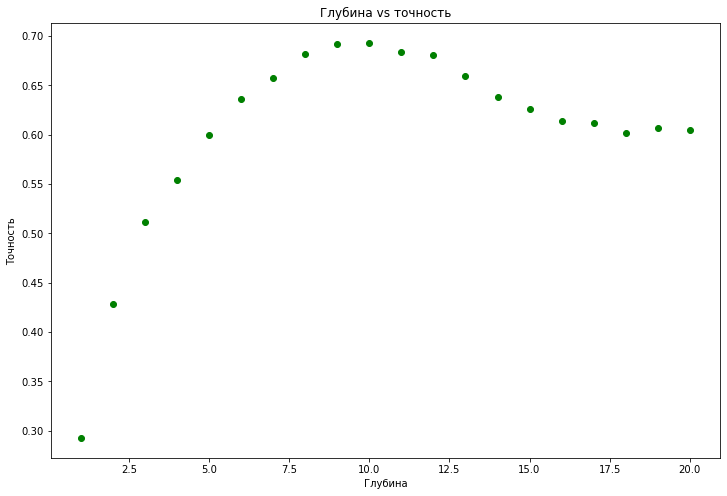

In [43]:
fig, ax = plt.subplots()

ax.scatter(depths, scores, c = 'green')
ax.set_title('Глубина vs точность')   
ax.set_xlabel('Глубина')
ax.set_ylabel('Точность')
fig.set_figwidth(12)
fig.set_figheight(8)

plt.show()



По скору видно, что при дереве с 10 вопросами точность очень классно выросла с 0.60 до 0.69. Теперь есть возможность попробовать указать мин количество листьев, попробовать увеличить скор на этом показателе 

Функция ниже позволяет для заданных пороговых значений min_samples_leaf (старт и максимум) вывести для каждого значения этого параметра из диапазона полученное значение коэффициента детерминации.


Функция также считает максимум для коэффициента детерминации и min_samples_leaf для этого максимума




In [51]:
def optimize_min_samples_leaf(start_ = 1, max_ = 50):
    max_score, best_leaf = 0, 0
    scores, leafs = [], []
    for cur_leaf in range(start_, max_ + 1):
        if (cur_leaf > 20) & ((cur_leaf % 3) > 0):
            continue
        model_fn, score_fn, y_pred = get_score( x = x, y = y, print_metrics = False, model = DecisionTreeRegressor
                                       (min_samples_leaf = cur_leaf))
        
        print (f'Для минимального количества листьев {cur_leaf} точность модели {score_fn}')
        if score_fn > max_score:
            max_score = score_fn
            best_leaf = cur_leaf
        scores.append(score_fn)
        leafs.append(cur_leaf)
        
    return scores, leafs, max_score, best_leaf


In [52]:
scores, leafs, max_score, best_leaf = optimize_min_samples_leaf(start_ = 1, max_ = 50)

print (f'\nОптимальное количество листьев {best_leaf}, максимальная точность модели {max_score}')

Предсказания целевой переменной:  [1.875   2.486   4.276   ... 1.214   2.584   5.00001]
Для минимального количества листьев 1 точность модели 0.5983233318376779
Предсказания целевой переменной:  [2.2605     2.38666667 3.85767    ... 1.599      3.3335     5.00001   ]
Для минимального количества листьев 2 точность модели 0.6405336236890893
Предсказания целевой переменной:  [2.0428  2.893   3.85767 ... 1.5     2.8444  4.62767]
Для минимального количества листьев 3 точность модели 0.6662811534337767
Предсказания целевой переменной:  [2.54425    2.68666667 3.4915     ... 1.0314     2.8444     4.720755  ]
Для минимального количества листьев 4 точность модели 0.6719219913513612
Предсказания целевой переменной:  [2.78775    2.7228     3.44400111 ... 1.0314     2.8444     4.173202  ]
Для минимального количества листьев 5 точность модели 0.69156959965136
Предсказания целевой переменной:  [2.78775    2.42214286 3.44400111 ... 1.09916667 4.27455556 4.88050625]
Для минимального количества листьев 6

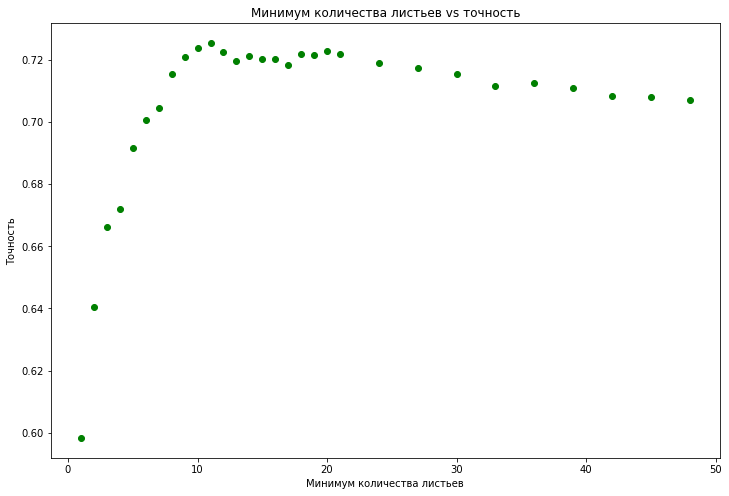

In [53]:
fig, ax = plt.subplots()

ax.scatter(leafs, scores, c = 'green')
ax.set_title('Минимум количества листьев vs точность')   
ax.set_xlabel('Минимум количества листьев')
ax.set_ylabel('Точность')
fig.set_figwidth(12)
fig.set_figheight(8)

plt.show()

Ну отлично, показатель скора на дереве решений вырос до 0.725, это классный результат и большая разница с первой моделью регресии 

### ВЫВОД 


Для модели линейной регрессии коэффициент детерминации для исходной выборки получился равным 0.60

В свою очередь для модели регрессии с помощью решающего дерева при оптимизации глубины получился результат 0.69.
А при оптимизации параметра min_samples_leaf максимальная точность модели 0.725


Таким образом решающее дерево для данного датасета, оказалось более эффективным.


Если я правильно понимаю теорию, чем больше размер обучающей выборки, тем больше вероятность более стабильной работы модели с решающим деревом.

